# Detect the volvox in the ratchet pip
Note:
after using cv2.imshow to desplay a image, please press any key to close the pop-out window instead of close it manually .

cv2.imshow('detected circles',outputimg)  
cv2.waitKey(0)  
cv2.destroyAllWindows()

## import

In [1]:
from platform import python_version
print(python_version())

3.5.2


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
import os
from skimage import measure
from PIL import Image
import scipy
import time

In [3]:
plt.rcParams['figure.figsize'] = [15, 5]

## define

In [4]:
def rescaleData(data, mindata=0, maxdata=1):
	return np.interp(data, (data.min(), data.max()), (mindata, maxdata))

In [5]:
def smooth_conv(x,window_len=11,window='flat'):

    if x.ndim != 1:
        raise ValueError ("smooth only accepts 1 dimension arrays.")
    if x.size < window_len:
        raise ValueError ("Input vector needs to be bigger than window size.")
    if window_len<3:
        return x
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError ("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')
    y=np.convolve(w/w.sum(),s,mode='valid')
    return y[int((window_len-1)/2):-int((window_len-1)/2+1)]


In [6]:
def rolling_window(a, size):
    shape = a.shape[:-1] + (a.shape[-1] - size + 1, size)
    strides = a.strides + (a. strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

# import data

## file information

In [7]:
avifile = '/media/hydroassist/volvoxSSD/20200601r35new/
capture = cv2.VideoCapture(avifile)
if not capture.isOpened:
    print('Unable to open: ' + file)
    exit(0)

frameW = capture.get(cv2.CAP_PROP_FRAME_WIDTH)
print('width=' ,frameW)
frameH = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
print('height=',frameH)
totalN = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
print('length=',totalN)

width= 1902.0
height= 279.0
length= 3551


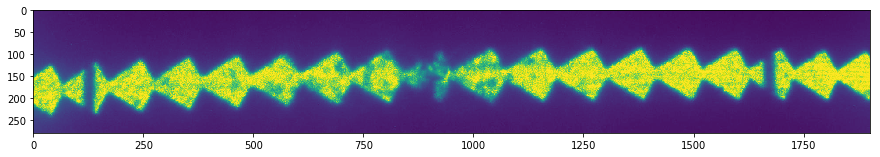

shape= (279, 1902)


In [8]:
# capture = cv2.VideoCapture(avifile)
FrameID = 0
capture.set(cv2.CAP_PROP_POS_FRAMES, FrameID)
ret, frame = capture.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)   
# plt.figure(figsize=(15,5))
plt.imshow(gray)
plt.show()
print('shape=',gray.shape)

## calculate the background

In [9]:
# https://docs.opencv.org/3.4/d1/dc5/tutorial_background_subtraction.html

capture = cv2.VideoCapture(avifile)
backSub = cv2.createBackgroundSubtractorMOG2()

if not capture.isOpened:
    print('Unable to open: ' + file)
    exit(0)

# while True:
for j in range(1):
    capture = cv2.VideoCapture(avifile)
    for ID in range(1000):
        capture.set(cv2.CAP_PROP_POS_FRAMES, ID)
        ret, frame = capture.read()
        if frame is None:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        fgMask = backSub.apply(gray)
        bgimg = backSub.getBackgroundImage()

        
        cv2.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
        cv2.putText(frame, str(capture.get(cv2.CAP_PROP_POS_FRAMES)), (15, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
        cv2.imshow('Frame', frame)
        cv2.imshow('background', bgimg)
#         cv2.imshow('FG Mask', fgMask)

        keyboard = cv2.waitKey(30)
        if keyboard == 'q' or keyboard == 27:
            break
capture.release()  
cv2.destroyAllWindows() 


In [19]:
capture.release()  
cv2.destroyAllWindows()

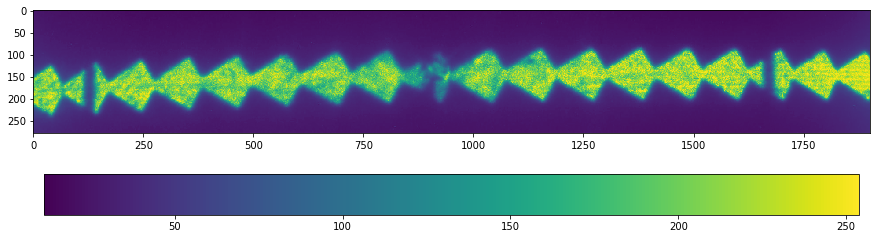

In [10]:
bgimgcopy = bgimg.copy()

plt.imshow(bgimgcopy)
plt.colorbar(orientation="horizontal")
plt.show()

## defind the parameter : cutthreshold, eroid and dilate

### sample image

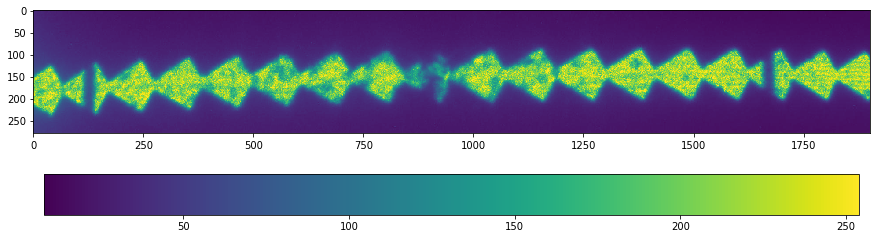

In [11]:
capture = cv2.VideoCapture(avifile)
FrameID = 550
capture.set(cv2.CAP_PROP_POS_FRAMES, FrameID)
ret, frame = capture.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)   
plt.imshow(gray)
plt.colorbar(orientation="horizontal")
plt.show()

### substract background

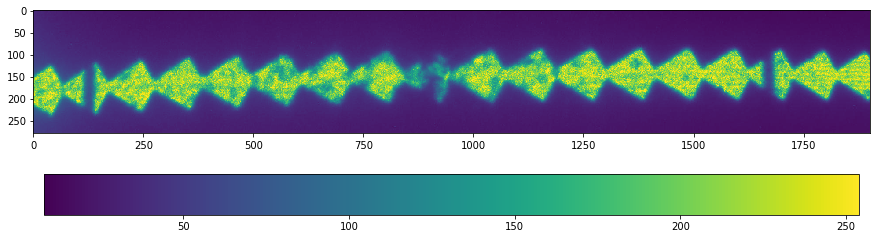

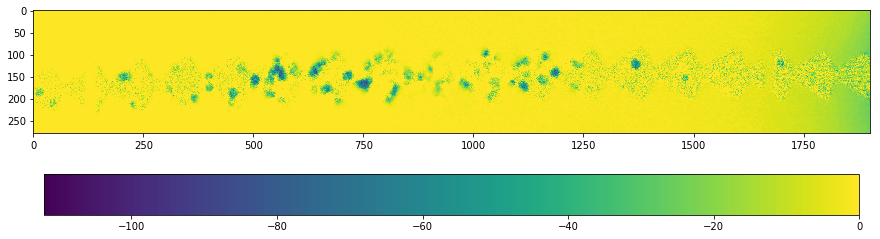

In [12]:
sbdata = gray.astype('float') - bgimgcopy.astype('float')
sbdata[sbdata>0]=0
plt.imshow(gray)
plt.colorbar(orientation="horizontal")
plt.show()
plt.imshow(sbdata)
plt.colorbar(orientation="horizontal")
plt.show()

### smooth image

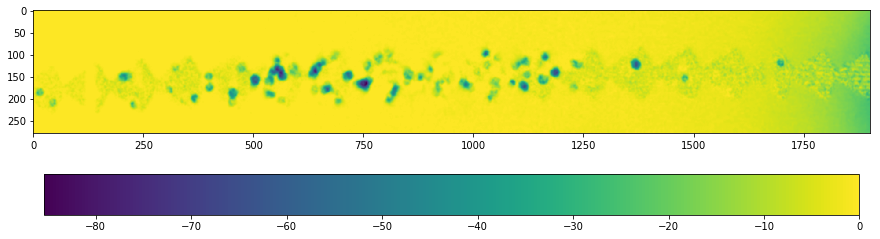

In [13]:
blur = cv2.GaussianBlur(sbdata,(9,9),0)
plt.imshow(blur)
plt.colorbar(orientation="horizontal")
plt.show()

### convert to binary by cutthreshold

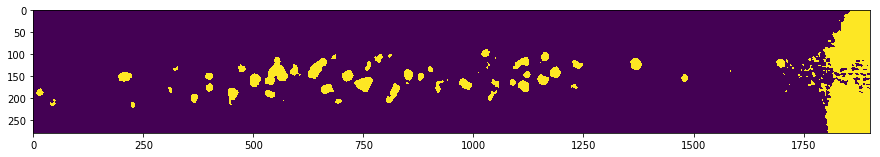

In [14]:
cutthreshold = -12
ret,thimg = cv2.threshold(blur,cutthreshold,255,cv2.THRESH_BINARY_INV)
plt.imshow(thimg)
plt.show()

### eroid and dilate

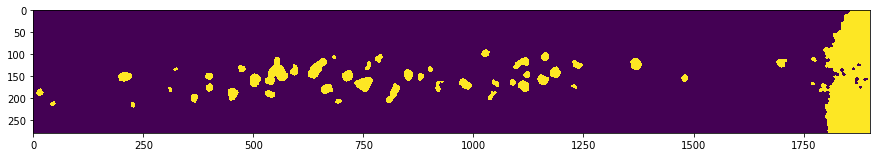

In [15]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))

closingimg = cv2.morphologyEx(thimg, cv2.MORPH_CLOSE, kernel)
openingimg = cv2.morphologyEx(closingimg, cv2.MORPH_OPEN, kernel)
plt.imshow(openingimg)
plt.show()

# Main program, moving direction of the volvox

## run the avi

In [ ]:
capture.release()  
cv2.destroyAllWindows() 

In [18]:
leftcue = []
rightcue = []
x=[]
y=[]
frameID = []

cutthreshold = -12
capture = cv2.VideoCapture(avifile)
if not capture.isOpened:
    print('Unable to open: ' + args.input)
    exit(0)

loopcount = 0
# while True:
for ID in range(0,totalN):
# for ID in range(0,250):
#     print(loopcount)
    capture.set(cv2.CAP_PROP_POS_FRAMES, ID)
    ret, frame = capture.read()
    if frame is None:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
    leftcue.append(np.sum(gray[0:50,0:50]))
    rightcue.append(np.sum(gray[0:50,-50:]))
    ########## remove background ##########
    sbdata = gray.astype('float') - bgimgcopy.astype('float')
    sbdata[sbdata>0]=0
    ########## remove noise by blur, eroid and dilate ##########
    blurimg = cv2.GaussianBlur(sbdata,(9,9),0)
    ret,thimg = cv2.threshold(blurimg,cutthreshold,255,cv2.THRESH_BINARY_INV)
    closingimg = cv2.morphologyEx(thimg, cv2.MORPH_CLOSE, kernel)
    openingimg = cv2.morphologyEx(closingimg, cv2.MORPH_OPEN, kernel)
    EDimg = openingimg # Dilation and Erosion
    ########## record the center of detected areas ##########
    lbimg = measure.label(EDimg)
    region = measure.regionprops(lbimg)
    for loopcount,props in enumerate(region):
        if (props.area > 15) & (props.area < 1000):
            tempx = props.centroid[1]
            tempy = props.centroid[0]
            x.append(tempx)
            y.append(tempy)
            frameID.append(ID)
            cv2.circle(EDimg,(int(tempx),int(tempy)),20,(128,128,128),2)
    ########## display the EDimage ##########
    cv2.putText(EDimg, str(capture.get(cv2.CAP_PROP_POS_FRAMES)), (15, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (128,128,128))
    cv2.imshow('EDimg', EDimg)
    cv2.putText(frame, str(capture.get(cv2.CAP_PROP_POS_FRAMES)), (15, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (128,128,128))
    cv2.imshow('frame', frame)
    
    keyboard = cv2.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break
        
dataset = pd.DataFrame({'x':np.array(x),'y':np.array(y),'frame':np.array(frameID)})
capture.release()                    
cv2.destroyAllWindows()



KeyboardInterrupt: 

In [ ]:
leftdiff = np.diff(leftcue-np.mean(leftcue))
rightdiff = np.diff(rightcue-np.mean(rightcue))

leftpeaks, _ = scipy.signal.find_peaks(leftdiff,height=np.max(leftdiff)/2)
rightpeaks, _ = scipy.signal.find_peaks(rightdiff,height=np.max(rightdiff)/2)

plt.plot((leftcue-np.mean(leftcue))/max(leftcue-np.mean(leftcue)))
plt.plot(leftpeaks,[0]*len(leftpeaks),'*')
plt.plot(rightpeaks,[0]*len(rightpeaks),'*')
plt.show()

In [ ]:
capture.release()                    
cv2.destroyAllWindows()

## save data

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(JamL, label='jamming length')
plt.plot(smoothJamL,label='smooth')
plt.plot(timedata, intercept + slope*(timedata), 'r', label='fitted line')
plt.text(0, np.max(JamL)-np.max(JamL)/4, 'slope='+str(slope*partL*fps*scalebar)[:6], fontsize=24)
# plt.text(0, np.max(JamL)-np.max(JamL)/2,'speed is too slow' , fontsize=24)
plt.title(avifile.split('/')[-1][:-4], fontsize=24)
plt.legend()
locs, labels = plt.xticks()
plt.xticks(locs,locs/fps, fontsize=20)
plt.xlabel('time (s)', fontsize=24)
locs, labels = plt.yticks()
plt.yticks(locs,np.around(locs*distance, decimals=2) , fontsize=20)
plt.ylabel('jamming length (mm)', fontsize=24)
plt.savefig(avifile[:-4] + '_jamming.png', bbox_inches='tight')
plt.show()

outfile = avifile[:-4]+'.npz'
np.savez(outfile, ActArea=ActArea, leftidxall=leftidxall, rightidxall=rightidxall)

In [ ]:
# ActArea = np.reshape(ActArea,[-1,partN]).T

In [ ]:
int((np.argmin(smoothidx2-smoothidx1))/partL)

In [ ]:
fig, axs = plt.subplots(partN,1, figsize=(15, partN))
fig.subplots_adjust(hspace=0.001)

for count,i in enumerate(np.array(ActArea).T):
    axs[count].plot(i)
    axs[count].set_ylim([0,1.1])
    if count < partN-1:
        axs[count].set_xticklabels(())
        axs[count].title.set_visible(False)

axs[int((np.argmin(smoothidx2-smoothidx1))/partL)].set_facecolor('lightgreen')
plt.show()

## save the data

In [ ]:
# cv2.destroyAllWindows()